# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
#1
"""
Your code here
"""
cut_rule = [0,1,3,6,np.inf]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 1.0]    276490
(1.0, 3.0]        30466
(3.0, 6.0]          534
(6.0, inf]           21
Name: CNT_CHILDREN_GROUP, dtype: int64

In [24]:
app_train[['CNT_CHILDREN','CNT_CHILDREN_GROUP','TARGET','AMT_INCOME_TOTAL']]

,CNT_CHILDREN,CNT_CHILDREN_GROUP,TARGET,AMT_INCOME_TOTAL
0,0,"(-0.001, 1.0]",1,202500.0
1,0,"(-0.001, 1.0]",0,270000.0
2,0,"(-0.001, 1.0]",0,67500.0
3,0,"(-0.001, 1.0]",0,135000.0
4,0,"(-0.001, 1.0]",0,121500.0
...,...,...,...,...
307506,0,"(-0.001, 1.0]",0,157500.0
307507,0,"(-0.001, 1.0]",0,72000.0
307508,0,"(-0.001, 1.0]",0,153000.0
307509,0,"(-0.001, 1.0]",1,171000.0


In [25]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL'].mean()
grouped_df

CNT_CHILDREN_GROUP  TARGET
(-0.001, 1.0]       0         168554.452269
                    1         166133.317001
(1.0, 3.0]          0         173824.963059
                    1         161627.570234
(3.0, 6.0]          0         173158.841202
                    1         150114.705882
(6.0, inf]          0         134500.000000
                    1         255000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [27]:
app_train['CNT_CHILDREN_GROUP']

0         (-0.001, 1.0]
1         (-0.001, 1.0]
2         (-0.001, 1.0]
3         (-0.001, 1.0]
4         (-0.001, 1.0]
              ...      
307506    (-0.001, 1.0]
307507    (-0.001, 1.0]
307508    (-0.001, 1.0]
307509    (-0.001, 1.0]
307510    (-0.001, 1.0]
Name: CNT_CHILDREN_GROUP, Length: 307511, dtype: category
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 3.0] < (3.0, 6.0] < (6.0, inf]]

In [33]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(-0.001, 1.0]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.001, 1.0]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.001, 1.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.001, 1.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.001, 1.0]"
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.001, 1.0]"
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,"(-0.001, 1.0]"
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.001, 1.0]"


TypeError: unsupported operand type(s) for +: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

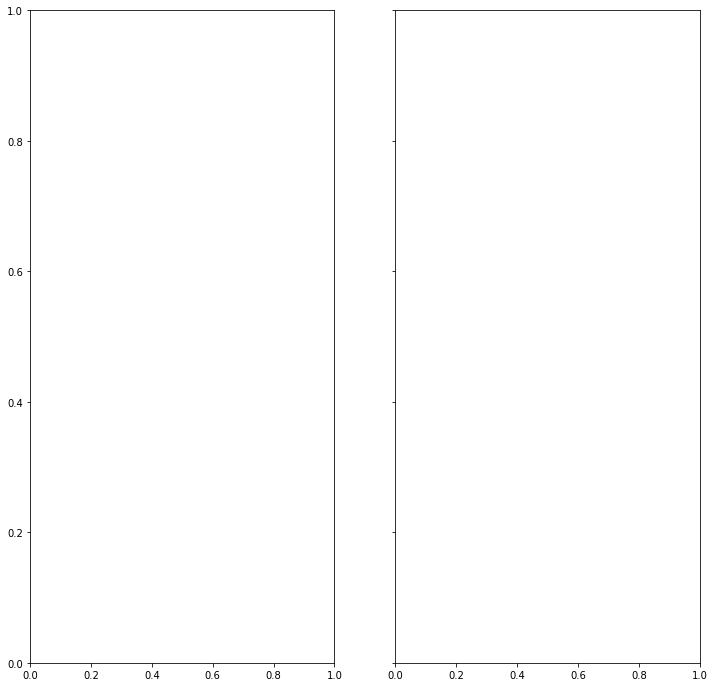

In [34]:
#2-2
"""
Your code here
"""
plt_column = ['CNT_CHILDREN_GROUP','TARGET']
plt_by = 'AMT_INCOME_TOTAL'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [17]:
grouped_df.apply(lambda x: (x-x.mean())/x.std())

AttributeError: 'float' object has no attribute 'mean'

In [35]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: x - x.mean())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

AttributeError: 'float' object has no attribute 'mean'